# Predctiction Of Percentage Of Marks For Students


### Author: Rahul Kulkarni


### Problem Statement:
Create a regression model for predicting marks for students.

### Importing required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Exploratory Data Analysis

In [2]:
students_df = pd.read_csv("D:/Grip_Tasks/marks.csv")
students_df.head()

,Hours,Score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Therefore we are provided with 2 variables: Hours studied by a student per day and percentage of score recieved by the student.

Lets visualize the data on a regression plot to get a better understanding of the relation between the variables

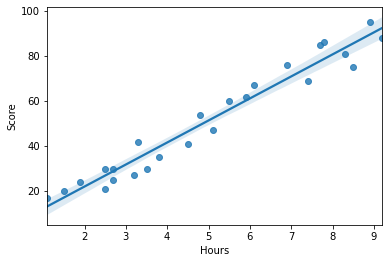

In [3]:
hours = students_df['Hours']
score = students_df['Score']
sns.regplot(x=hours,y=score)
plt.show()

It is clearly visible that there is a linear variation between Hours studied by a student and Score. Furthermore it is a linearly increasing variation.

Lets check to what degree does the independant variable('Hours') affect the target variable('Score')

          Hours     Score
Hours  1.000000  0.976191
Score  0.976191  1.000000


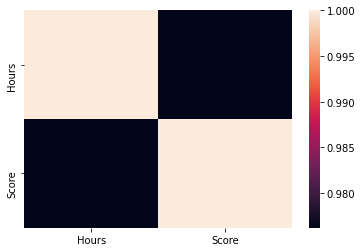

In [4]:
corr_matrix = students_df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix)
plt.show()

As we can see from the correlation coefficient values, 'Hours' and 'Score' are strongly related.

### Modelling

As the data is in the form of continuos variables the best model to use for prediction is the regression model.From the scatter plot and correlation values it is evident that simple linear regression would give an accurate prediction.

### Importing libraries for modelling

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [6]:
lr = LinearRegression()
hours = np.array(hours).reshape(-1,1)
score = np.array(score)
lr.fit(hours,score)
score_predict = lr.predict(hours)
score_predict

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

Let's see the equation for the regression line generated by the model.

In [7]:
coefficient = lr.coef_
intercept = lr.intercept_
equation='Score = '+str(coefficient[0])+'*Hours + '+str(intercept)
equation

'Score = 9.77580339078747*Hours + 2.483673405373203'

### Model Analysis

To check how accurate our model is, we can calculate various statistical metrics.

1. Cofficient of determination:

In [43]:
lr.score(hours,score)

0.9529481969048356

The value for coefficient of determination is high which means that 95.29% change is observed in the score due to hours studied by the student.

2. Mean Squared Error

In [44]:
mean_squared_error(score,score_predict)

28.882730509245448

The value of mean squared error is low hence the model seems to be a good fit.

3. Mean Absolute Error

In [34]:
mean_absolute_error(score,score_predict)

4.972805319866374

The value of mean absolute error is also low hence the model seems to be a good fit.

Let's take a look at the distribution plot between the actual score values and the predicted score values.

c:\users\rahul\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\rahul\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


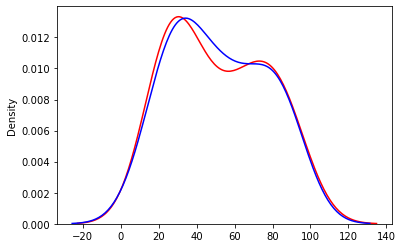

In [47]:
#distribution plot
ax1 = sns.distplot(score,hist=False,color='r',label='Actual Value')
sns.distplot(score_predict,hist=False,color='b',label='Fitted Values', ax=ax1)
plt.show()

The above plot shows clearly how our predicted values almost overlap the given score values.

### Predicting Marks for Test Data

Let's predict the score for a student who studied for 9.25 hours/day.

In [49]:
lr.predict([[9.25]])

array([92.90985477])

Therefore our prediction for hours = 9.25 is a score of 92.91%. Which seems to be quite accurate since the study hour is very high.

### Conclusion

We have predicted the marks for students using a linear regression model which seems to be a fairly accurate one, which can also be seen from the various statistical metrics calculated.